##(a) ERA5 
### PCA under 9 pressure levels

In [8]:
import xarray as xr
import numpy as np
import glob
from pathlib import Path

In [ ]:
data_dir = Path("era5/")
file_pattern = "era5_full_1.5deg_*.zarr"
file_list = sorted(glob.glob(str(data_dir / file_pattern)))

In [ ]:
for file in file_list:
    print(f"Processing file: {file}")
    
    # Open the dataset for the current day
    ds = xr.open_dataset(file, engine='zarr')

In [34]:
matrix = []
for l in [1000, 925, 850, 700, 500, 300, 200, 100, 50]:
    print(l)
    vectors = []
    
    for file in file_list:
        
        # Open the dataset for the current day
        ds = xr.open_dataset(file, engine='zarr')
    
    
        # Select the temperature ('t') variable
        temp_data = ds['t'].sel(level=l)
    
        # Reshape the (level, latitude, longitude) data into a 1D vector for each day
        temp_flattened = temp_data.values.reshape(-1)  # Flatten to 1D (121*240)
    
        # Append the flattened vector (representing one day) to the list
        vectors.append(temp_flattened)
    matrix_for_pca = np.column_stack(vectors)

    print(matrix_for_pca.shape)
    matrix.append(matrix_for_pca.T)

1000
(29040, 16436)
925
(29040, 16436)
850
(29040, 16436)
700
(29040, 16436)
500
(29040, 16436)
300
(29040, 16436)
200
(29040, 16436)
100
(29040, 16436)
50
(29040, 16436)


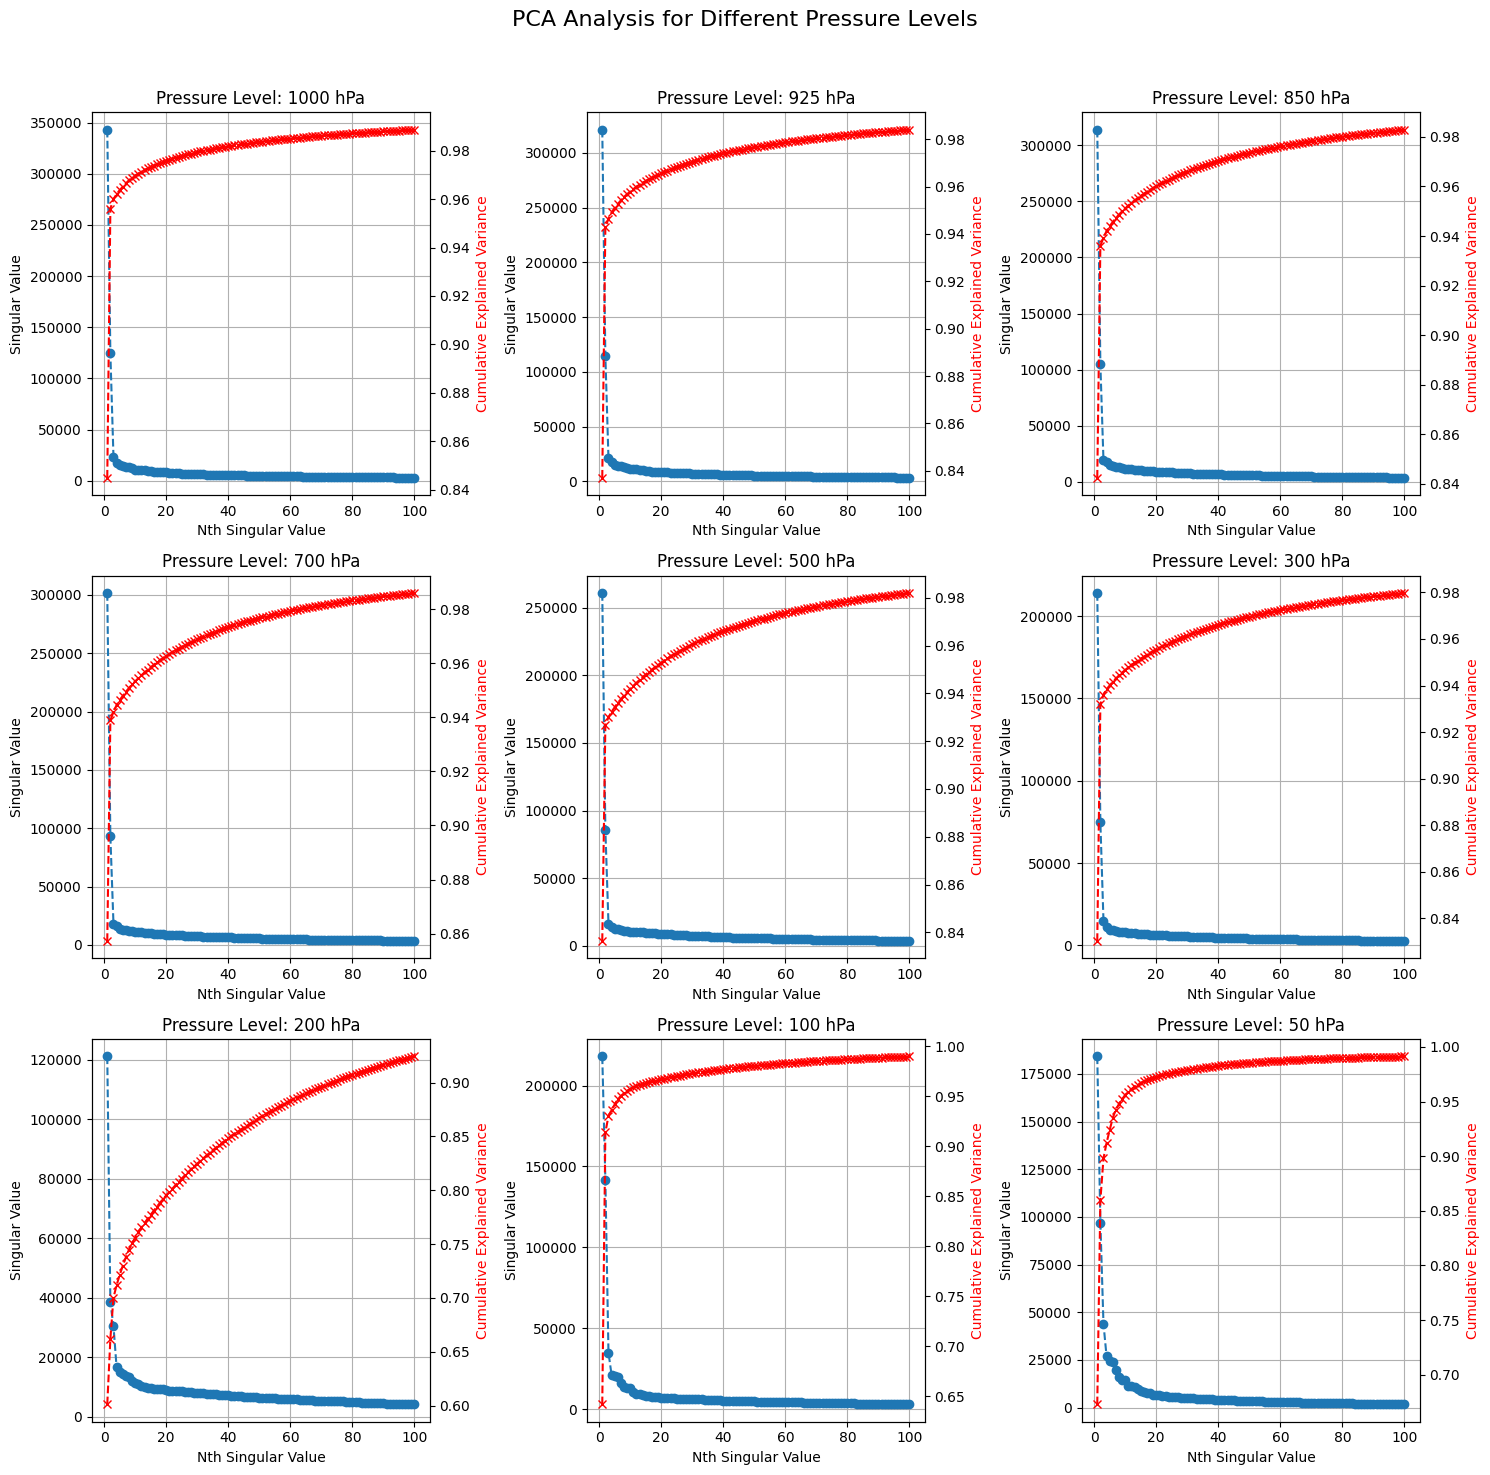

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Assuming matrix contains 9 matrices (one for each level)
levels = [1000, 925, 850, 700, 500, 300, 200, 100, 50]  # The pressure levels
n_components = 100  # Number of principal components to compute

# Create a figure for the 3x3 grid of plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('PCA Analysis for Different Pressure Levels', fontsize=16)

# Loop through each matrix and apply PCA
for idx, (matrix_for_pca, level) in enumerate(zip(matrix, levels)):
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(matrix_for_pca.T)

    # Singular values and explained variance
    singular_values = pca.singular_values_
    explained_variance = pca.explained_variance_ratio_
    cumulative_explained_variance = explained_variance.cumsum()

    # Get the appropriate subplot (row, col) based on index
    ax_singular = axes[idx // 3, idx % 3]  # 3x3 grid, row-major order

    # Plot singular values
    ax_singular.plot(range(1, len(singular_values) + 1), singular_values, marker='o', linestyle='--')
    ax_singular.set_title(f'Pressure Level: {level} hPa')
    ax_singular.set_xlabel('Nth Singular Value')
    ax_singular.set_ylabel('Singular Value')

    # Add gridlines
    ax_singular.grid(True)

    # Plot cumulative explained variance on the same axes
    ax_singular_secondary = ax_singular.twinx()
    ax_singular_secondary.plot(range(1, len(cumulative_explained_variance) + 1), 
                               cumulative_explained_variance, marker='x', color='red', linestyle='--')
    ax_singular_secondary.set_ylabel('Cumulative Explained Variance', color='red')

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
plt.show()

Test

In [23]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components you want
n_components = 100  # Change this to the number of components you need
pca = PCA(n_components=n_components)

# Fit PCA to the matrix
pca_result = pca.fit_transform(matrix_for_pca.T)

# pca_result now contains the principal components for each grid point
print("Shape of PCA result:", pca_result.shape)

Shape of PCA result: (16436, 100)


In [15]:
print("Shape of input matrix for PCA:", matrix_for_pca.shape)

Shape of input matrix for PCA: (29040, 16436)


In [19]:
print(len(pca.components_[0]))

29040


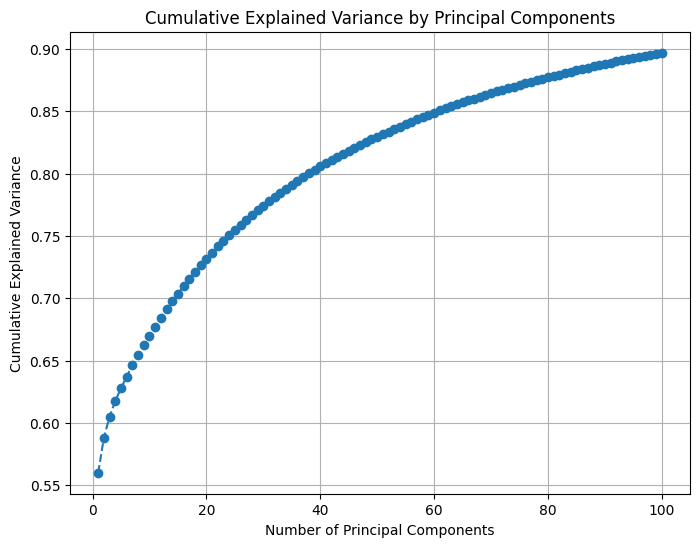

In [25]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

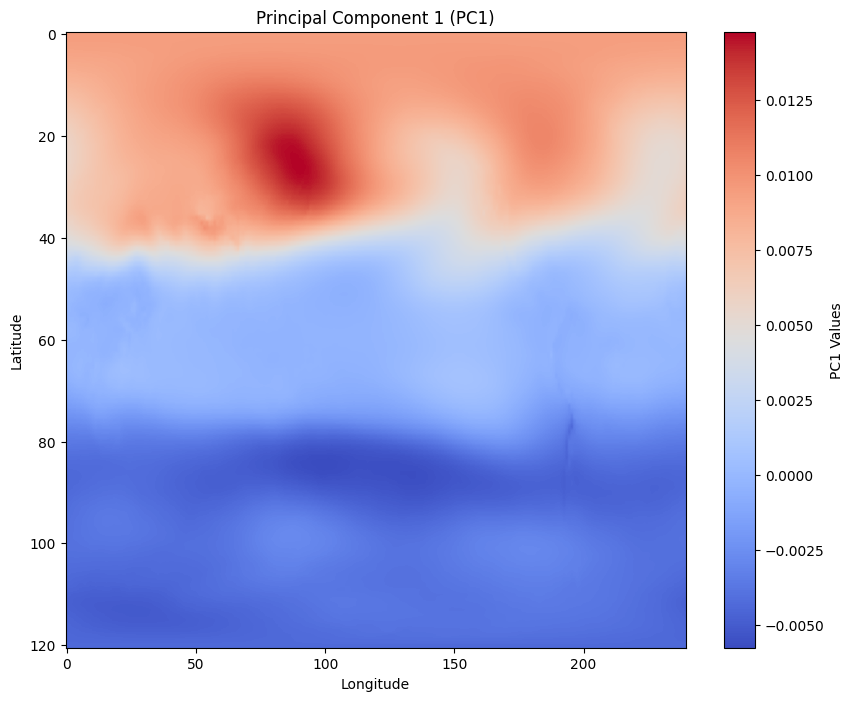

In [21]:
import matplotlib.pyplot as plt
component_idx = 0  # First principal component (PC1)

# Reshape the first principal component back into the original 121x240 grid
pc1_reshaped = pca.components_[component_idx].reshape(121, 240)

# Plot the principal component as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(pc1_reshaped, cmap='coolwarm', aspect='auto')
plt.colorbar(label=f'PC{component_idx + 1} Values')
plt.title(f'Principal Component {component_idx + 1} (PC{component_idx + 1})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [5]:
temp_data = ds['t'].sel(level=500)
temp_data

<xarray.DataArray 't' (latitude: 121, longitude: 240)> Size: 232kB
[29040 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float32 484B 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
    level      int32 4B 500
  * longitude  (longitude) float32 960B 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    time       datetime64[ns] 8B ...
Attributes:
    long_name:      Temperature
    standard_name:  air_temperature
    units:          K

In [7]:
temp_flattened = temp_data.values.reshape(-1)
len(temp_flattened)

29040